<a href="https://colab.research.google.com/github/gizelleguerra/img_processing_practice/blob/main/GPT3_exploring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using GPT-3 with OpenAI API

First Install OpenAI Package

In [ ]:
pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 4.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for openai: filename=openai-0.26.5-py3-none-any.whl size=67620 sha256=3355815651531340eac75a722062e3eca1e84d8c1be0bed7dd9a4b1e19e61365
  Stored in directory: /root/.cache/pip/wheels/a7/47/99/8273a59fbd59c303e8ff175416d5c1c9c03a2e83ebf7525a99
Successfully built openai


## Imports and API Setup

In [ ]:
import os
import openai

In [ ]:
# your private API Key
api_key = "your private API key here"
openai.api_key = api_key

## Example 1
Set up a test prompt and print the respose

In [ ]:
prompt = "Say this is a test"

In [ ]:
response = openai.Completion.create(
  model="text-curie-001",
  prompt = prompt,
  max_tokens=10,
)

In [ ]:
print(response)

{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "text": "\n\nThis is a test."
    }
  ],
  "created": 1677168087,
  "id": "cmpl-6n8K72HUo5tbabnsfl9zVrWrt62Xj",
  "model": "text-curie-001",
  "object": "text_completion",
  "usage": {
    "completion_tokens": 7,
    "prompt_tokens": 5,
    "total_tokens": 12
  }
}


In [ ]:
print(response.choices[0].text)



This is a test.


## More Examples of using GPT-3 

these examples use the Curie model, which is also very powerful but 1/10th the cost of the most advanced Davinci model.

A bit about the response set up and parameters:
*  engine is set the model we want to use, in this case Curie.
*  prompt is set to “text”, which is a variable representing the text input to the function.
*  temperature sets out how deterministic the output of the model is. A high temperature gives the model more freedom to sample outputs. For example, assuming the probability of returning word A and word B as the next word in a certain task is 80% and 20% respectively. Setting the a ‘low’ temperature (i.e. closer to 0) is likely to return word A on all instances the function is run, whereas setting a ‘high’ temperature (i.e. closer to 1) allows the model to return word B for some instances.
* top_p sets out the distribution to select the outputs from. Using the same example above, a top_p of 0.75 tells the model to only select word A as it’s the only word with a probability exceeding 0.75.
* max_tokens sets out the limit for the number of words to be returned. This may have financial implications as GPT-3 may charge per token for commercial applications. A general rule of thumb is the more words the model is allowed to return, the less ‘abstract’ the outputs will be.
* frequency_penalty and presence_penalty both are parameters which penalise the model for returning outputs which appear often.

In [ ]:
# function to structure the response
# def GPT_Completion(texts):
#   openai.api_key = api_key
#   response = openai.Completion.create(
#   engine="text-curie-001",
#   prompt =  texts,
#   temperature = 0.7,
#   top_p = 1,
#   max_tokens = 64,
#   frequency_penalty = 0,
#   presence_penalty = 0
#   )
#   return print(response.choices[0].text)

In [ ]:
# function to structure the response - includes more configurable parameters
def GPT_Completion2(texts, tp = 1, temp = 0.7 , tokens = 64):
  openai.api_key = api_key
  response = openai.Completion.create(
  engine="text-curie-001",
  prompt =  texts,
  temperature = temp,
  top_p = tp,
  max_tokens = tokens,
  frequency_penalty = 0,
  presence_penalty = 0
  )
  return print(response.choices[0].text)

In [ ]:
# ask the model to generate a recipe based on a list of ingrediets (you might need more tokens to see the full recipe - tokens parameter)
recipe = 'Provide a cooking recipe based on the following ingredients: \
\n \nApple \
\n \nFlour \
\n \nChicken \
\n \nSalt'

#GPT_Completion(recipe, tp = 0.75)
GPT_Completion2(recipe, tp = 0.75, temp = 0.6, tokens = 100)

 
 
Pepper 
 
Oil 

Apple Chicken Fry

1. Preheat oil in a large skillet over medium-high heat.

2. In a bowl, combine flour, salt, and pepper.

3. Dredge chicken in the flour mixture until coated.

4. Add chicken to the hot oil and cook until golden brown, about 4 minutes per side.

5. Serve hot with apples cooked in their own juice


In [ ]:
# ask model for a spreadsheet of best movies in 2019
spreadsheet = 'Create a spreadsheet showing the 2019 oscar nominees for best movie'
GPT_Completion2(spreadsheet)



The nominees for the 2019 oscar awards for best movie are:

Avengers: Endgame 
Black Panther 
Bohemian Rhapsody 
The Favourite 
Green Book 
Mary Poppins Returns 
Roma 
Vice 

Best Picture


In [ ]:
# ask model to summarize text (need top_p = 1)
prompt = "Summarize this for a second-grade student:\n\nJupiter is the fifth planet from the Sun and the largest in the Solar System. It is a gas giant with a mass one-thousandth that of the Sun, but two-and-a-half times that of all the other planets in the Solar System combined. Jupiter is one of the brightest objects visible to the naked eye in the night sky, and has been known to ancient civilizations since before recorded history. It is named after the Roman god Jupiter.[19] When viewed from Earth, Jupiter can be bright enough for its reflected light to cast visible shadows,[20] and is on average the third-brightest natural object in the night sky after the Moon and Venus."

GPT_Completion2(prompt)



Jupiter is the fifth planet from the Sun and the largest in the Solar System. It is a gas giant with a mass one-thousandth that of the Sun, but two-and-a-half times that of all the other planets in the Solar System combined. Jupiter is one of the brightest


In [ ]:
prompt

'Summarize this for a second-grade student:\n\nJupiter is the fifth planet from the Sun and the largest in the Solar System. It is a gas giant with a mass one-thousandth that of the Sun, but two-and-a-half times that of all the other planets in the Solar System combined. Jupiter is one of the brightest objects visible to the naked eye in the night sky, and has been known to ancient civilizations since before recorded history. It is named after the Roman god Jupiter.[19] When viewed from Earth, Jupiter can be bright enough for its reflected light to cast visible shadows,[20] and is on average the third-brightest natural object in the night sky after the Moon and Venus.'

## Fine-tuning GPT-3
For specific applications, the model will preform better if it is trained on relevant data

Fine-tuning lets you get more out of the models available through the API by providing:

*  Higher quality results than prompt design
*  Ability to train on more examples than can fit in a prompt
*  Token savings due to shorter prompts
*  Lower latency requests

Fine-tuning improves on few-shot learning by training on many more examples than can fit in the prompt, letting you achieve better results on a wide number of tasks. Once a model has been fine-tuned, you won't need to provide examples in the prompt anymore. This saves costs and enables lower-latency requests.

At a high level, fine-tuning involves the following steps:

*  Prepare and upload training data (your data must be a JSONL document)
*  Train a new fine-tuned model
*  Use your fine-tuned model

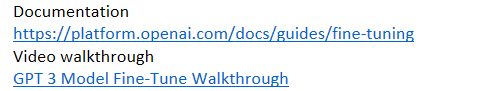

In [ ]:
# prepare data

In [ ]:
openai tools fine_tunes.prepare_data -f <LOCAL_FILE>